# Prediction Prix de l'action avec utilisation de Machine Learning en Python

#### Le datasat que nous allons utiliser pour analyser et construire notre modèle de prédiction est Netflix Stock Price data. Nous allons utiliser OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 1st January 2002 (entrée en bourse de l'entreprise) to 31st December 2022 qui représente 10 années d'actions de Netflix.

In [4]:
# Importation des librairies

import numpy as np #permet de faire de gros calculs dans un court temps
import pandas as pd #charge la data frame en 2D et permet l'analyse
import matplotlib.pyplot as plt #utilisé pour la vizualisation
import seaborn as sb

#ce module contient de multiples librairies avec des fonctions pré-implantées pour performer
#des tâches à partir des données au développement du modèle et évaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#### Nous allons maintenant importe notre base de donnée et créer une dataframe

In [5]:
df = pd.read_csv(r'C:\Users\Boomi\Desktop\projects\python\NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


#### Avec les 5 premières lignes, on peut voir qu'il y a certaines données manquantes car la bourse est fermée le weekend et pendant les vacances (pas de trading pendant ces jours).

In [6]:
df.shape #on va connaître le nombre de données (ligne et colonne)

(5044, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


## Analyse exploratoire des données

#### On va avoir une approche pour analyser les données en utilisant des techiniques visuelles, dans le but d'y découvrir des tendances, patternes ou vérifier des hypotèses à l'aide de statistiques et de représentations graphiques.

#### Ici nous allons analyser comment le prix de l'action a bougé dans le temps et comment la fin de trimestres affecte les prix de l'action.

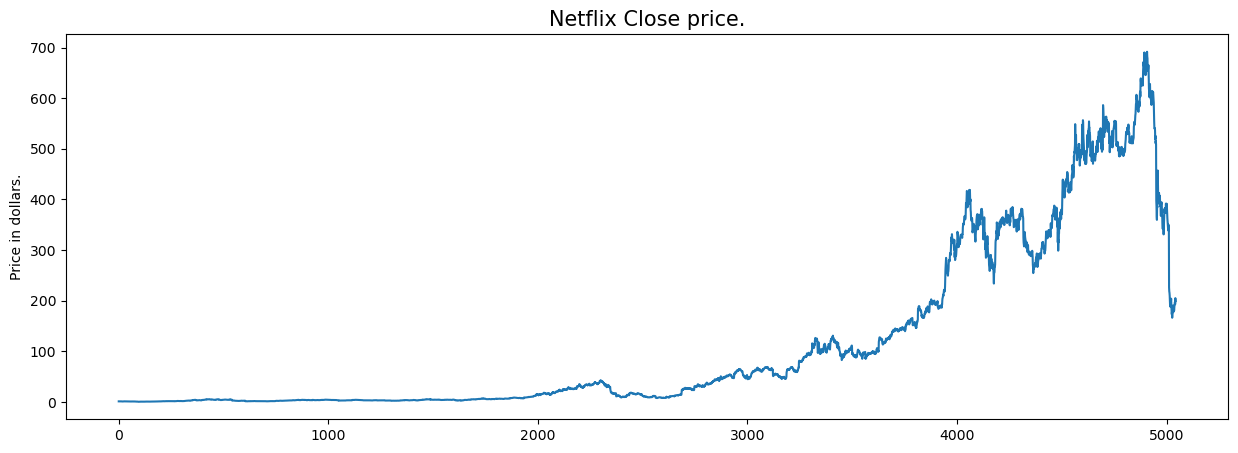

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Netflix Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

#### Les prix de l'action de Netflix montrent une tendance croissante comme on peut le voir dans le graphique mais ont eux une forte baisse récemment.

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


#### On remarque que les données dans le colonnes "Close" et "Adj Close" sont les mêmes. Nous allons alors vérifier si c'est le cas dans chaques lignes.

In [11]:
df[df['Close']== df['Adj Close']].shape

(5044, 7)

#### On peut alors conclure que toutes les lignes des colonnes "Closes" et "Adj Close" ont les mêmes données. Avoir des données redondantes dans notre base de données est inutiles : on va alors laisser cette colonne avant une analyse plus approndie.

In [12]:
df = df.drop(['Adj Close'], axis=1)

#### Nous allons maintenant dessiner notre diagramme de distribution pour les caractérisques continues données dans le jeu de données.

In [13]:
# Nous allons d'abord vérifier les valeurs nulles si il y en a : 
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

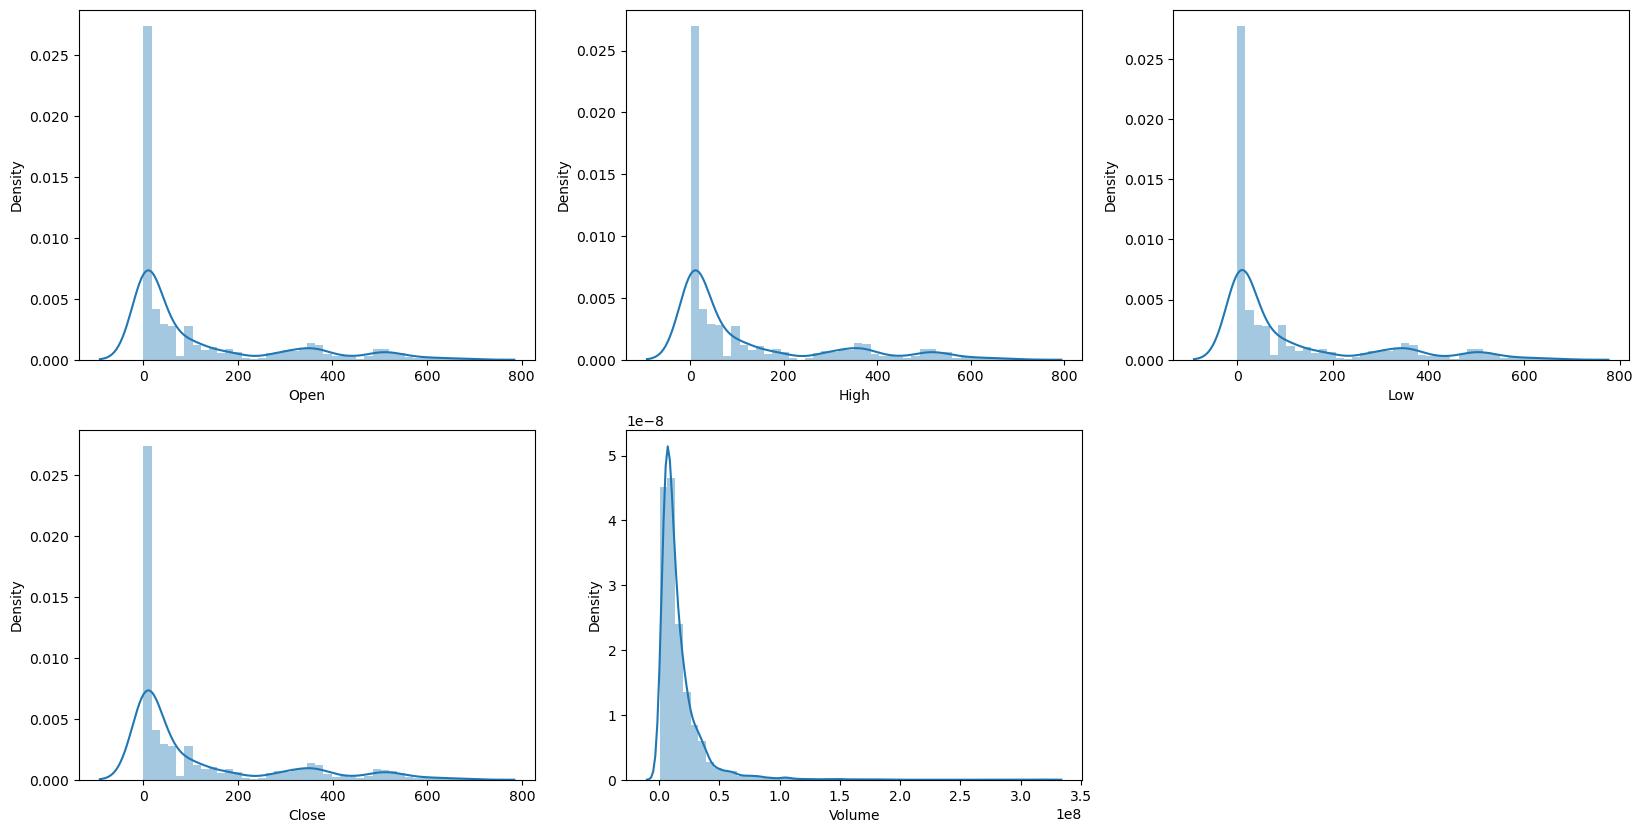

In [14]:
paramètres = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(paramètres):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

#### Dans le diagramme de distribution des données OHLC, on peut voir 1 pic qui signifier que la donnée a varié considérablement dans une région. 

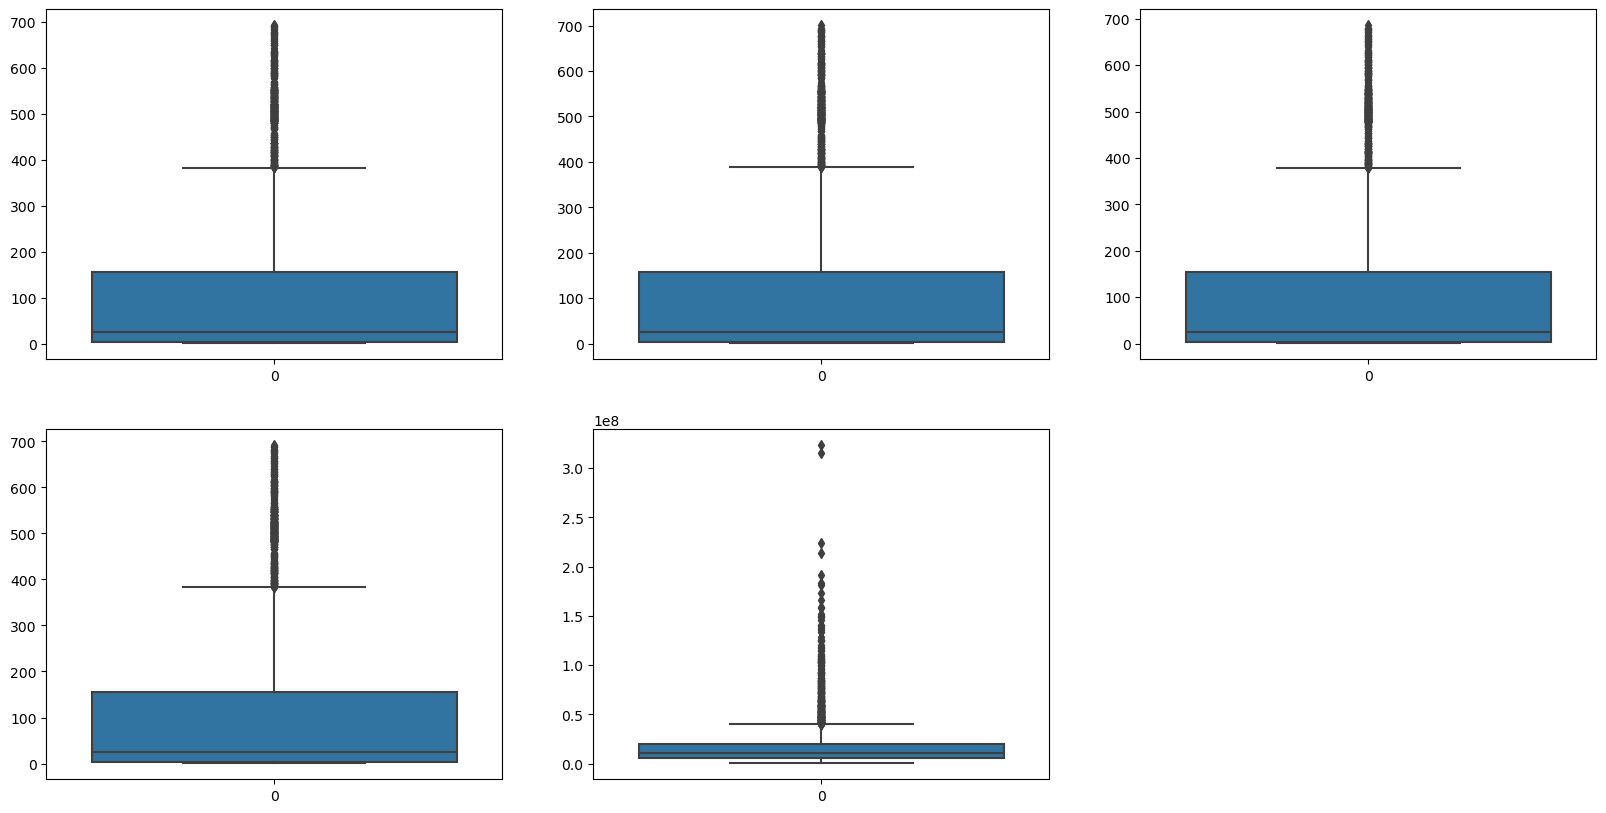

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(paramètres):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

#### Avec les boxplot, on réalise que les données "Volume" contiennent des valeurs abberrantes comparés aux autres colonnes.

## Ingénierie des fonctionnalités

#### Cela va nous aider à dériver certaines fonctionnalités importantes de celles exitantes. Ces fonctionnalités supplémentaures aident parfois à augmenter les performances du modèle et aident à mieux comprendre les données.

In [16]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,23,5,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,24,5,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,28,5,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,29,5,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,30,5,2002


#### Nous avons maintenant 3 colonnes en plus 'day', 'month', 'year' : elles ont été dérivé de la colonne 'Date' qui était initialement dans le jeu de données.

In [17]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,104790000,23,5,2002,0
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,11104800,24,5,2002,0
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,6609400,28,5,2002,0
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,6757800,29,5,2002,0
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,10154200,30,5,2002,0


#### 1 trimestre = 3 mois
#### Chaque entreprise prépare ses résultats trimestrielles et les publie pour que les individus analysent la performance de l'entreprise. Ces résultats affectent fortement les stock price, c'est pourquoi nous avons ajouté ce paramètre.

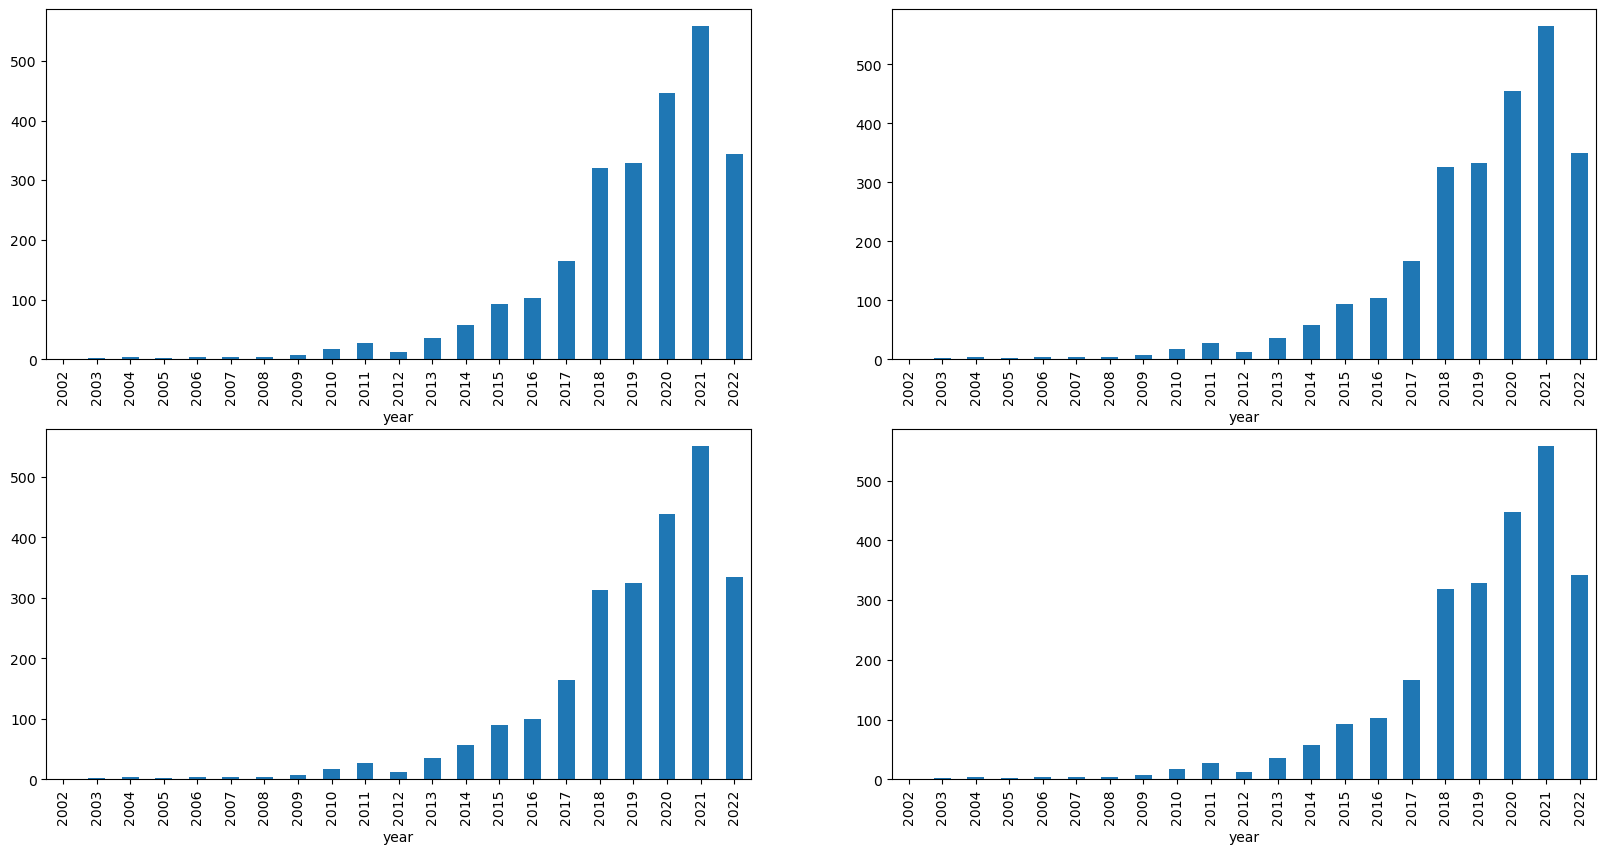

In [18]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

#### Le graphique nous permet de conclure que les prix d'actions ont plus que doublé de 2017 à 2021. 

In [19]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,116.777010,118.575423,114.898448,116.814328,1.758196e+07,15.741849,6.091235,2011.968292
1,115.860642,117.573056,113.950352,115.752775,1.446459e+07,15.729571,7.439153,2011.782481


#### On remarque :

    - Les prix sont plus élevés dans les mois qui ne se terminent pas par un trimestre (par rapport à ceux des mois qui se terminent pas un trimestre).
    
    - Le volumes des trades est plus bas dans les mois qui se terminent pas un trimestre.

In [20]:
df['open_close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['cible'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

#### Nous avons ajouté des colonnes supplémentaires qui nous aiderons dans notre modèle. Nous avons ajouté un paramètre "cible", qui représente le signal de quand il faut acheter ou non.

Nous allons d'abord vérifier que notre nouveau paramètre "cible" est équilibré en utilisant un graphique en camambert (ou pie chart).

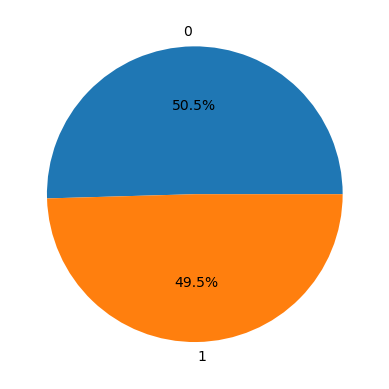

In [21]:
plt.pie(df['cible'].value_counts().values, labels=[0,1], autopct='%1.1f%%')
plt.show()

#### Quand on ajoute un nouveau paramètre à notre jeu de données, on doit s'assurer qu'il n'y a pas de paramètres corrélées car elles n'aident pas dans le processus d'apprentissage de l'algorithme.

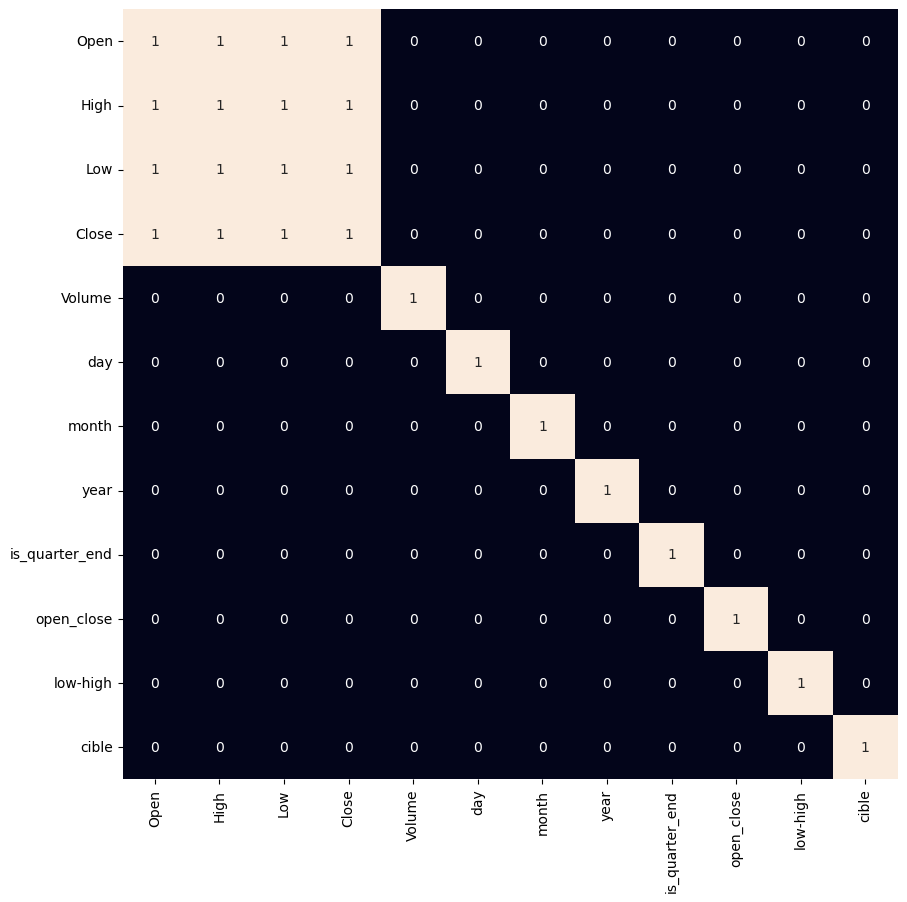

In [22]:
plt.figure(figsize=(10,10))

# On porte notre recherhe sur les paramètres fortements corréelés, nous allons visualiser
#notre carte avec ce critère uniquement.

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

#### On peut voir grâce à notre carte qu'il y a un forte corrélation entre OHLC qui est plutôt logique, les paramètres ajoutés ne sont pas fortement corrélés entre eux , ce qui est bien pour la construction de notre modèle.

## Fractionnement et normalisation des données

In [23]:
paramètres = df[['open_close', 'low-high', 'is_quarter_end']]
cible = df['cible']

scaler = StandardScaler()
paramètres = scaler.fit_transform(paramètres)

X_train, X_valid, Y_train, Y_valid = train_test_split(paramètres, cible, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(4539, 3) (505, 3)


#### Après sélection des paramètres pour entraîner le model, on doit normaliser les données. En effet les données normalisées vont permettre de stabiliser et d'entraîner rapidement le model.
#### Après que notre jeu de données ait été diviser en deux parties avec un ratio 90/10, on peut évaluer la performance de notre model sur les données non visibles.

## Développement et évalutation du modèle

#### Nous allons former nos modèles, puis en fonction de leurs performances sur les données de formation et de validation, nous allons choisir le modèle qui nous permettra d'atteindre notre objectif.

Pour l'évaluation métrique, nous allons uytiliser la courbe ROC-AUC (area under the curve), car au lieu de prédire la probabilité qui est de 0 ou 1, on aimerait prédire des probabilités continues entre 0 et 1. 
Avec ce type de probabilité, la courbe ROC-AUC est généralement utilisée pour mesurer la précision des prédictions.

In [30]:
!pip install xgboost
!pip install -U scikit-learn
!pip install scikit-plot
!pip install mlxtend
!pip install --upgrade xgboost

In [43]:
import scikitplot as skplt
import matplotlib.pyplot as plt

In [44]:
from sklearn.datasets import make_classification

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

In [41]:
model = [LogisticRegression(), SVC(
    kernel='poly', probability=True)]

for i in range(3):
    model[1].fit(X_train, Y_train)
    
    print(f'{model[1]} : ')
    print('Training Accurary : ', metrics.roc_auc_score(
        Y_train, model[1].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(
        Y_valid, model[1].predict_proba(X_valid)[:,1]))
    print()

SVC(kernel='poly', probability=True) : 
Training Accurary :  0.48913922696902173
Validation Accuracy :  0.4718011486677338

SVC(kernel='poly', probability=True) : 
Training Accurary :  0.4984458259325044
Validation Accuracy :  0.501937984496124

SVC(kernel='poly', probability=True) : 
Training Accurary :  0.4888684673041928
Validation Accuracy :  0.4696670118946741



# Conclusion

### On peut oberserve que la précision atteinte avec notre Machine Learning modèle n'est pas mieux que de devinier simplement avec une probabilité de 50%. Les raison possibles seraient un manque de données, ou l'utilisation d'un modèle simple pour une tâche aussi complexe qu'est la prédiction de la bourse.